In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

Checkered Board

In [17]:
#Bàn cờ có cạnh là 8 ô, mỗi ô là 50 điểm ảnh
square = 50
board = 8

#Viết hàm điền màu trắng cho các ô
def create_chessboard(board=8, square=50):
    chessboard = np.zeros((board*square,board*square),dtype=np.uint8)
    for row in range(board):
        for col in range(board):
            if((row+col)%2==0):
                chessboard[row*square : (row+1)*square,
                           col*square : (col+1)*square] = 255
                
    return chessboard

#Tạo ma trận bàn cờ
chessboard = create_chessboard(board,square)
chessboard

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

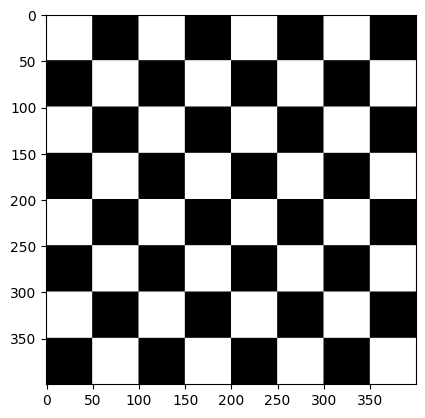

In [18]:
plt.imshow(chessboard, cmap='gray')
plt.show()

Color correction

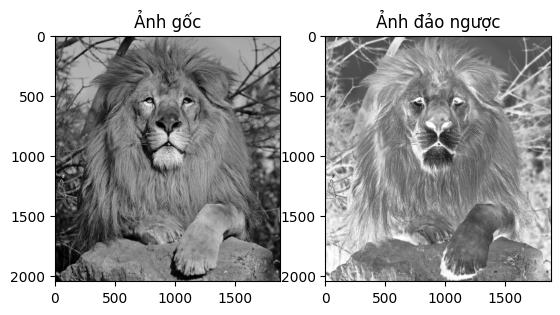

In [19]:
#Đọc hình ảnh
image = cv2.imread('img/Lion.jpg',0)

#Đảo ngược màu sắc hình ảnh
inverted_image = 255 - image

#Lưu lại ảnh
cv2.imwrite('img/noiL.jpg',inverted_image)
plt.figure()
plt.subplot(121); plt.title("Ảnh gốc"); plt.imshow(image, cmap='gray')
plt.subplot(122); plt.title("Ảnh đảo ngược"); plt.imshow(inverted_image, cmap='gray')
plt.show()

Rotate Image

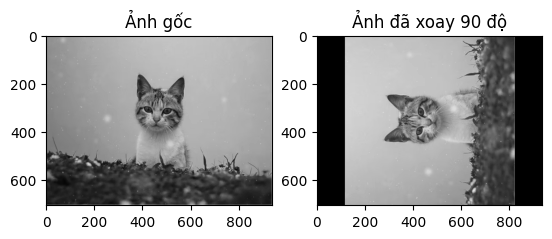

In [20]:
#Đọc file
img = cv2.imread('img/cat.jpg',0)
#Hàm rotate
def rotate_img(img, angle):
    #Lấy kích thước ảnh
    (h,w) = img.shape
    #Tính toán tâm của hình ảnh
    center = (w//2, h//2)
    #Chuyển đội độ sang rad
    angle_rad = math.radians(angle)
    #Tạo hình ảnh mới với kích thước tương tự
    rotate_image = np.zeros_like(img)
    
    #Xoay
    for y in range(h):
        for x in range(w):
            #khoảnh cách từ điểm đó đến tâm
            x_centered = x - center[0] 
            y_centered = y - center[1]
            
            #tính tọa độ mới sau khi quay
            new_x = int(x_centered * math.cos(angle_rad) - y_centered * math.sin(angle_rad) + center[0])
            new_y = int(x_centered * math.sin(angle_rad) + y_centered * math.cos(angle_rad) + center[1])
            
            #Nếu tọa độ mới nằm trong phạm vi hình ảnh
            if 0 <= new_x < w and 0 <= new_y < h:
                rotate_image[y,x] = img[new_y, new_x]
    return rotate_image           

r_img = rotate_img(img,90)
cv2.imwrite('img/r_cat.jpg',r_img)
plt.figure()
plt.subplot(121); plt.title("Ảnh gốc"); plt.imshow(img,cmap='gray')
plt.subplot(122); plt.title("Ảnh đã xoay 90 độ"); plt.imshow(r_img, cmap='gray')
plt.show()

Color separation

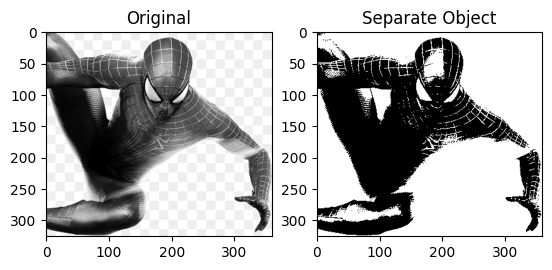

In [21]:
# Đọc ảnh
img = cv2.imread('img/spider_man.jpg',0)
# Đặt giá trị ngưỡng
thresh_value = 127
_, binary_image = cv2.threshold(img, thresh_value, 255, cv2.THRESH_BINARY)
plt.figure()
plt.subplot(121); plt.title("Original"); plt.imshow(img, cmap='gray')
plt.subplot(122); plt.title("Separate Object"); plt.imshow(binary_image,cmap='gray');
plt.show()

Corner line

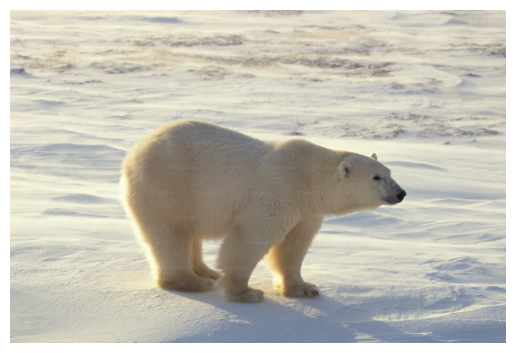

(2016, 3000, 3)


In [33]:
img = cv2.imread('img/white_bear.jpg')
plt.imshow(img[:,:,::-1])
plt.axis('off')
plt.show()
print(img.shape)

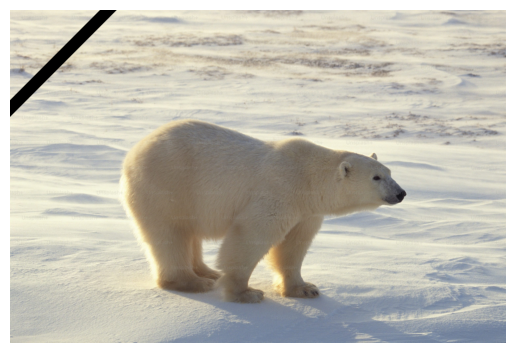

In [45]:
def drawCornerLine(img,width):
    h,w = img.shape[:2]
    start_x = w//5
    for row in range(h):
        for col in range(w):
            if(col <= (start_x + width - row) and col >= (start_x - width - row)):
                img[row, col,:] = 0
    return img
img_copy = img.copy()
img_copy = drawCornerLine(img_copy,50)
plt.imshow(img_copy[:,:,::-1])
plt.axis('off')
plt.show()

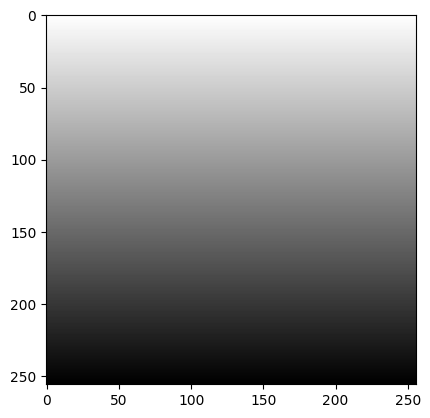

In [24]:
#Gradient
#Tạo một mảng 2 chiều với kích thước 256x256
img_arr = np.zeros((256,256),dtype=np.uint8)
img_arr.shape
#Viết hàm thay đổi sắc độ từ trên xuống dưới
def Gradient_down(img):
    g_img = img.copy()
    h,w = img_arr.shape
    for i in range(h):
        g_img[i,:] = 255-i
    return g_img
g_img = Gradient_down(img_arr)
plt.imshow(g_img, cmap='gray')

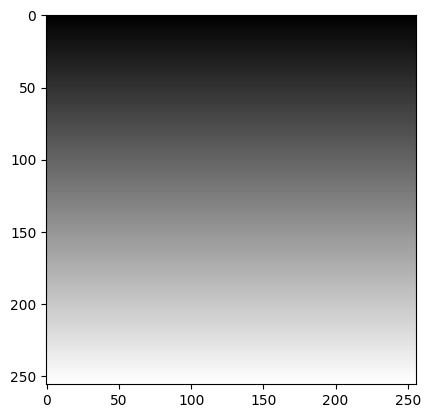

In [25]:
#Viết hàm thay đổi sắc độ từ trên dưới lên trên
def Gradient_up(img):
    g_img = img.copy()
    h,w = img_arr.shape
    for i in range(h):
        g_img[i,:] = 0+i
    return g_img
g_img = Gradient_up(img_arr)
plt.imshow(g_img, cmap='gray')

Letter B

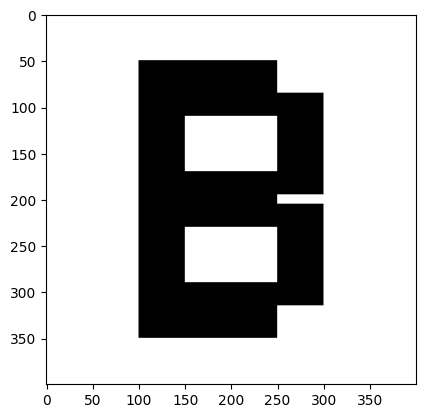

In [101]:
#Tạo ảnh
img = np.ones((400,400),dtype=np.uint8)*255

def draw_B(img, width, size_text):
    h,w = img.shape
    hText, wText = size_text
    #Kiểm tra kích thước chữ và ảnh
    if(h<hText or w<wText):
        raise ValueError("Size text lơn hơn kích thước ảnh") 
    #Tìm điểm bắt đầu vẽ chữ
    start_x = (w - wText ) // 2
    start_y = (h - hText) // 2
    #Vẽ phần dọc của chữ B
    img[start_y:start_y + hText, start_x:start_x + width] = 0
    #Vẽ 3 đường ngang
    pNgang = (hText)//5
    for i in [0, 2, 4]:  # Các phần ngang thứ 0, 2, 4
        y = start_y + i * pNgang
        img[y:y + pNgang, start_x + width:start_x + wText - width] = 0
    #Vẽ 2 nét dọc bên phải
    for i in [1, 3]:  # Các phần ngang thứ 1, 3
        y = start_y + i * pNgang
        img[y-width//2:y + pNgang+width//2, start_x + wText - width:start_x + wText] = 0
    return img
img = draw_B(img,50,(300,200))
plt.imshow(img,cmap='gray')
plt.show()

Find secret by substract

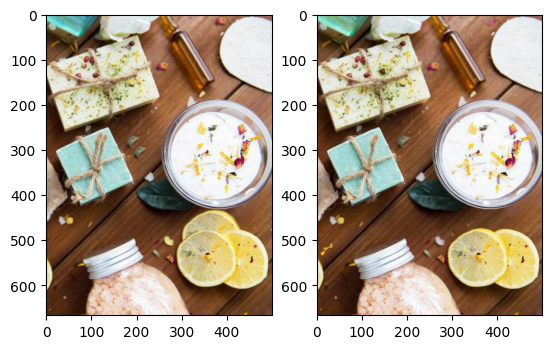

In [27]:
img1 = cv2.imread('img/pic1.jpg')
img2 = cv2.imread('img/pic2.jpg')
plt.figure()
plt.subplot(121); plt.imshow(img1[:,:,::-1])
plt.subplot(122); plt.imshow(img2[:,:,::-1])
plt.show()

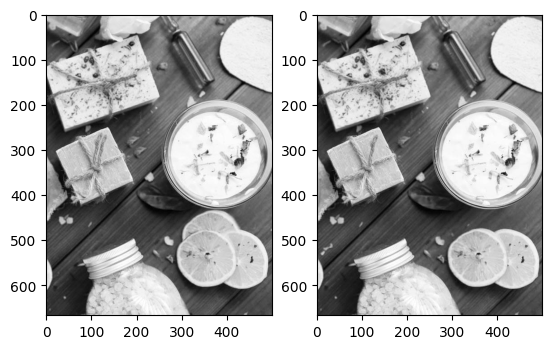

In [28]:
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.subplot(121); plt.imshow(gray_img1, cmap='gray')
plt.subplot(122); plt.imshow(gray_img2, cmap='gray')
plt.show()

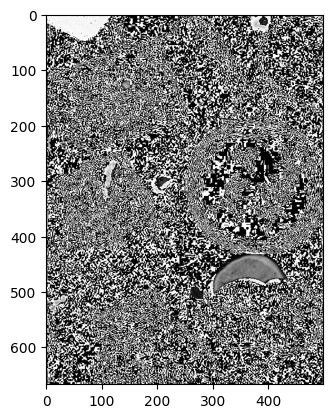

In [32]:
def findDifferent(img1, img2):
     # Đảm bảo rằng hai hình ảnh có cùng kích thước và kiểu dữ liệu
    if img1.shape != img2.shape:
        raise ValueError("Hai hình ảnh phải có cùng kích thước.")
    
    # Thực hiện phép trừ giữa hai hình ảnh
    img1_arr = np.array(img1)
    img2_arr = np.array(img2)
    different = np.abs(img1_arr - img2_arr)
    different = np.clip(different, 0, 255).astype(np.uint8)
    return different
different = findDifferent(gray_img1,gray_img2)
plt.imshow(different,cmap='gray')
plt.show()